# Nueral Network
- bigram character level language model
- train neural net with weights/params
- neural network used to set probabilities of next character
- optimize params nad lower loss with gradient descent

In [15]:
import torch
import matplotlib.pyplot as plt

In [1]:
#load the dataset
# split into words
words = open("names.txt", "r").read().splitlines()

In [95]:
# look up table string to int
chars = sorted(list(set("".join(words))))
stoi = {s:i + 1 for i,s in enumerate(chars)}
stoi["."] = 0

itos = {i:s for s, i in stoi.items()}


In [7]:
# create a training set of bigrams (x, y), (input, output)
xs, ys = [], []

# just one example "emma"
for w in words[:1]:
    # create start and end tokens to specify start and ending
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [8]:
xs

tensor([ 0,  5, 13, 13,  1])

In [9]:
ys

tensor([ 5, 13, 13,  1,  0])

In [10]:
# when input is 0(.), desired label is 5 (e)
# when input is 5(e), desired label is 13 (m)
# weights/params need to be arranged so e has a high probability given . or m has a high probabilty given e (for this training set)

In [13]:
# neural net made up of neurons
# neurons have weights
# doesn't make sense to have an input neruon take on integer values

# one hot encoding
# ex. 13 -> vector of all zeros except the 13th index which is turned to 1
# PyTorch one_hot

import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27)
xenc, xenc.shape

(tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0]]),
 torch.Size([5, 27]))

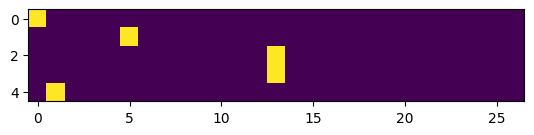

In [16]:
plt.imshow(xenc)

In [17]:
# be careful
# datatype should be a float if fed into a neural net
xenc.dtype

torch.int64

In [18]:
xenc = F.one_hot(xs, num_classes=27).float()

In [20]:
xenc, xenc.dtype

(tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 torch.float32)

In [22]:
# construct first neuron
# neuron will look at input vectors
# wx + b (wx dot produt)

# initialize weights
# column vector of 27 numbers
W = torch.randn((27, 1))
W

tensor([[-0.0780],
        [ 0.0557],
        [ 0.4350],
        [-1.2950],
        [-0.6858],
        [-0.4140],
        [ 0.0504],
        [-0.7037],
        [-1.1415],
        [-1.1591],
        [ 0.1261],
        [-1.7313],
        [-0.5056],
        [-0.6538],
        [-0.5367],
        [ 1.3418],
        [-0.8485],
        [-0.0428],
        [-0.7017],
        [ 1.2444],
        [-0.2586],
        [-0.0855],
        [-0.5840],
        [ 1.1810],
        [ 1.7472],
        [-0.5148],
        [ 0.1656]])

In [23]:
# weights multiplied by inputs
xenc @ W # matmul wx

tensor([[-0.0780],
        [-0.4140],
        [-0.6538],
        [-0.6538],
        [ 0.0557]])

In [24]:
# (5, 27) @ (27, 1) = (5, 1) 
# 27 dimensions will multiply and add
# 5 activations of this neuron on 5 inputs

In [25]:
# instead of 1 neuron make 27 neurons
W = torch.randn((27, 27))
xenc @ W

tensor([[-0.6129,  1.5024, -0.3730,  1.1610,  0.6176,  0.0468, -0.4312, -0.7279,
          0.3839, -0.6634,  0.0693,  0.0421,  0.4504,  0.4992,  0.5268,  0.0693,
         -0.4026,  0.3930, -0.4126, -0.6523,  0.7386,  2.5292, -0.6711, -0.6273,
         -0.9378,  1.4649,  2.2418],
        [-0.5540,  0.2061, -0.2047, -0.5337,  1.2296,  0.5108,  1.3219,  0.4500,
         -0.8790,  1.1559, -3.0929, -0.3975, -0.5695, -0.3605,  1.0312, -1.0282,
         -0.3140, -0.9962,  0.9886, -0.3869, -0.5897, -2.9958, -0.2369, -0.3214,
         -1.0455,  0.2372, -2.4673],
        [ 2.1784,  1.3450,  0.2595,  0.0613,  0.0444,  2.0564,  1.0692,  0.1808,
          0.7143,  0.4599, -0.1578,  0.6507, -0.5619, -1.1454, -1.4254,  1.1943,
          0.7458,  2.3220, -0.5967,  0.9672,  2.0604, -2.2235,  0.0245,  0.0815,
          1.0706,  1.4673,  0.2673],
        [ 2.1784,  1.3450,  0.2595,  0.0613,  0.0444,  2.0564,  1.0692,  0.1808,
          0.7143,  0.4599, -0.1578,  0.6507, -0.5619, -1.1454, -1.4254,  1.1943

In [26]:
# (5, 27) @ (27, 27) -> (5, 27)
(xenc @ W).shape

torch.Size([5, 27])

In [41]:
# for every 27 neurons what is the firing rate of those neurons on 5 examples

# firing rate of 13th neuron looking at the 3rd input
# dot product between 3rd input and 13th column of the W matrix
(xenc @ W) [3, 13]

tensor(-1.1454)

In [42]:
# 3rd input in one hot encoding
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
# 13th index value in each of the rows
W[:, 13]

tensor([ 0.4992, -0.9882, -0.8694, -0.6105, -0.4751, -0.3605,  0.2041,  0.1776,
        -1.1690,  0.5140,  0.2643,  0.1177, -0.2057, -1.1454, -0.1709,  1.6234,
         0.8698,  0.0848, -0.6842, -1.5993,  0.4968, -0.3804, -0.5999,  0.2268,
         0.6615, -0.8734,  0.3565])

In [46]:
# each value multiplied by W and summed (wx)
# since only 1 input value has a 1 value that is all that is taken
xenc[3] * W[:, 13]

tensor([ 0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000,  0.0000,  0.0000,
        -0.0000,  0.0000,  0.0000,  0.0000, -0.0000, -1.1454, -0.0000,  0.0000,
         0.0000,  0.0000, -0.0000, -0.0000,  0.0000, -0.0000, -0.0000,  0.0000,
         0.0000, -0.0000,  0.0000])

In [47]:
(xenc[3] * W[:, 13]).sum()

tensor(-1.1454)

In [55]:
# right now we have negative and positive numbers
(xenc @ W)

tensor([[-0.6129,  1.5024, -0.3730,  1.1610,  0.6176,  0.0468, -0.4312, -0.7279,
          0.3839, -0.6634,  0.0693,  0.0421,  0.4504,  0.4992,  0.5268,  0.0693,
         -0.4026,  0.3930, -0.4126, -0.6523,  0.7386,  2.5292, -0.6711, -0.6273,
         -0.9378,  1.4649,  2.2418],
        [-0.5540,  0.2061, -0.2047, -0.5337,  1.2296,  0.5108,  1.3219,  0.4500,
         -0.8790,  1.1559, -3.0929, -0.3975, -0.5695, -0.3605,  1.0312, -1.0282,
         -0.3140, -0.9962,  0.9886, -0.3869, -0.5897, -2.9958, -0.2369, -0.3214,
         -1.0455,  0.2372, -2.4673],
        [ 2.1784,  1.3450,  0.2595,  0.0613,  0.0444,  2.0564,  1.0692,  0.1808,
          0.7143,  0.4599, -0.1578,  0.6507, -0.5619, -1.1454, -1.4254,  1.1943,
          0.7458,  2.3220, -0.5967,  0.9672,  2.0604, -2.2235,  0.0245,  0.0815,
          1.0706,  1.4673,  0.2673],
        [ 2.1784,  1.3450,  0.2595,  0.0613,  0.0444,  2.0564,  1.0692,  0.1808,
          0.7143,  0.4599, -0.1578,  0.6507, -0.5619, -1.1454, -1.4254,  1.1943

In [54]:
# interpret them as log counts
# exponentiate them
# negative numbers turn into numbers below 1
# positive numbers turn into more positive numbers

In [56]:
# exponentiated outputs give us something we can interpet as counts which we can normalize into probability
# sometimes called logits = log counts
logits = xenc @ W # log counts
logits

tensor([[-0.6129,  1.5024, -0.3730,  1.1610,  0.6176,  0.0468, -0.4312, -0.7279,
          0.3839, -0.6634,  0.0693,  0.0421,  0.4504,  0.4992,  0.5268,  0.0693,
         -0.4026,  0.3930, -0.4126, -0.6523,  0.7386,  2.5292, -0.6711, -0.6273,
         -0.9378,  1.4649,  2.2418],
        [-0.5540,  0.2061, -0.2047, -0.5337,  1.2296,  0.5108,  1.3219,  0.4500,
         -0.8790,  1.1559, -3.0929, -0.3975, -0.5695, -0.3605,  1.0312, -1.0282,
         -0.3140, -0.9962,  0.9886, -0.3869, -0.5897, -2.9958, -0.2369, -0.3214,
         -1.0455,  0.2372, -2.4673],
        [ 2.1784,  1.3450,  0.2595,  0.0613,  0.0444,  2.0564,  1.0692,  0.1808,
          0.7143,  0.4599, -0.1578,  0.6507, -0.5619, -1.1454, -1.4254,  1.1943,
          0.7458,  2.3220, -0.5967,  0.9672,  2.0604, -2.2235,  0.0245,  0.0815,
          1.0706,  1.4673,  0.2673],
        [ 2.1784,  1.3450,  0.2595,  0.0613,  0.0444,  2.0564,  1.0692,  0.1808,
          0.7143,  0.4599, -0.1578,  0.6507, -0.5619, -1.1454, -1.4254,  1.1943

In [71]:
counts = logits.exp() # equivalent to N in bigram (counts of each from a data sample)
# now we can normalize

probs = counts / counts.sum(1, keepdims=True)
probs 

# also called the soft max
# soft max activiation function
# takes logits, exponentiates them and normalizes

tensor([[0.0096, 0.0800, 0.0123, 0.0568, 0.0330, 0.0187, 0.0116, 0.0086, 0.0261,
         0.0092, 0.0191, 0.0186, 0.0279, 0.0293, 0.0301, 0.0191, 0.0119, 0.0264,
         0.0118, 0.0093, 0.0373, 0.2233, 0.0091, 0.0095, 0.0070, 0.0770, 0.1675],
        [0.0188, 0.0401, 0.0266, 0.0191, 0.1116, 0.0544, 0.1224, 0.0512, 0.0136,
         0.1037, 0.0015, 0.0219, 0.0185, 0.0228, 0.0915, 0.0117, 0.0238, 0.0121,
         0.0877, 0.0222, 0.0181, 0.0016, 0.0258, 0.0237, 0.0115, 0.0414, 0.0028],
        [0.1211, 0.0526, 0.0178, 0.0146, 0.0143, 0.1072, 0.0399, 0.0164, 0.0280,
         0.0217, 0.0117, 0.0263, 0.0078, 0.0044, 0.0033, 0.0453, 0.0289, 0.1398,
         0.0075, 0.0361, 0.1076, 0.0015, 0.0140, 0.0149, 0.0400, 0.0595, 0.0179],
        [0.1211, 0.0526, 0.0178, 0.0146, 0.0143, 0.1072, 0.0399, 0.0164, 0.0280,
         0.0217, 0.0117, 0.0263, 0.0078, 0.0044, 0.0033, 0.0453, 0.0289, 0.1398,
         0.0075, 0.0361, 0.1076, 0.0015, 0.0140, 0.0149, 0.0400, 0.0595, 0.0179],
        [0.0380, 0.0145,

In [73]:
probs[0].sum()

tensor(1.0000)

In [74]:
probs.shape

torch.Size([5, 27])

In [75]:
# for every 1 of 5 examples, we have a row that tells us the percent of time an index will be chosen as the next letter

In [79]:
# Summary
# have sample inputs and outputs 

# ex.
# input = ['.', 'e', 'm', 'm', 'a'] -> [0, 5, 13, 13, 1]
# output = ['e', 'm', 'm', '.'] -> [5, 13, 13, 1, 0]

# equivalent output value at index is what is predicted given the input at index
xs = torch.tensor([0, 5, 13, 13, 1])
ys = torch.tensor([5, 13, 13, 1, 0])

# one hot encode inputs to make them a tensor of 5 rows and 27 values
# 27 values will be 0 with the exception of a 1 at index = input value
# make sure they are floats
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [83]:
# randomly initialize 27 neuron weights, each neuron will recieve 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)
W[0]

tensor([ 1.5674, -0.2373, -0.0274, -1.1008,  0.2859, -0.0296, -1.5471,  0.6049,
         0.0791,  0.9046, -0.4713,  0.7868, -0.3284, -0.4330,  1.3729,  2.9334,
         1.5618, -1.6261,  0.6772, -0.8404,  0.9849, -0.1484, -1.4795,  0.4483,
        -0.0707,  2.4968,  2.4448])

In [88]:
logits = xenc @ W # predict log counts of outputs by matmuling xenc and weights
counts = logits.exp() # exponentiate log counts, to simualate real counts
probs = counts / counts.sum(1, keepdims=True) # normalize to make them probabilities
probs[0], probs[0].sum(), probs.shape

(tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459]),
 tensor(1.0000),
 torch.Size([5, 27]))

In [100]:
# calculate log likelihood
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item() # input character index
    y = ys[i].item() # output character index
    print("--------")
    print(f"bigram example {i + 1}: {itos[x]}{itos[y]} (index {x},{y})")
    print("input to the neural net:", x)
    print("output probabilities for next character from the neural net:")
    print(probs[i])
    print("actual next character:", y, itos[y])
    p = probs[i, y]
    print("probability assigned to the next character", p.item())
    logp = torch.log(p)
    print("log likelihood", logp.item())
    nll = -logp
    print("negative log likelihood:", nll.item())
    nlls[i] = nll

print("========")
print("average negative log likelihood, i.e expected loss=", nlls.mean().item())
    

--------
bigram example 1: .e (index 0,5)
input to the neural net: 0
output probabilities for next character from the neural net:
tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
actual next character: 5 e
probability assigned to the next character 0.01228625513613224
log likelihood -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (index 5,13)
input to the neural net: 5
output probabilities for next character from the neural net:
tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
actual next character: 13 m
probability assigned to the next character 0.01805070042610168

In [101]:
# minimize loss by tuning W based on the gradients to minimize loss

# single linear layer followed by a soft max
# negative log likelihood for loss calculation

In [118]:
# randomly generate neuron weights
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True) # must tell PyTorch we want to calculate grad

In [119]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W # predict log counts of outputs by matmuling xenc and weights
counts = logits.exp() # exponentiate log counts, to simualate real counts
probs = counts / counts.sum(1, keepdims=True) # normalize to make them probabilities

In [106]:
probs.shape

torch.Size([5, 27])

In [120]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [121]:
# probabilities of getting 'emma'
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [122]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [123]:
probs[torch.arange(5), ys]

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)

In [124]:
# take probabilities, look at the log, take mean, take negative
# loss vectorized
loss =  -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [125]:
# backward pass
# reset all gradients
W.grad = None # set to 0
loss.backward() # fills in gradients of all intermediates all the way back to W


In [129]:
W.grad[0], W.grad.shape

(tensor([ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292]),
 torch.Size([27, 27]))

In [130]:
# every element of W.grad is telling us the influence of that specific weight on the loss function
# use gradient information ot update weights

In [131]:
W.data += -0.1 * W.grad # 0.1 step size

In [132]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W # predict log counts of outputs by matmuling xenc and weights
counts = logits.exp() # exponentiate log counts, to simualate real counts
probs = counts / counts.sum(1, keepdims=True) # normalize to make them probabilities
loss =  -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7492, grad_fn=<NegBackward0>)

In [133]:
# a litle bit less loss

In [157]:
# all together
# create a training set of bigrams (x, y), (input, output)
xs, ys = [], []
num = 0
for w in words:
    # create start and end tokens to specify start and ending
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        num += 1
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [158]:
# gradient descent
for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W # predict log counts of outputs by matmuling xenc and weights
    counts = logits.exp() # exponentiate log counts, to simualate real counts
    probs = counts / counts.sum(1, keepdims=True) # normalize to make them probabilities
    loss =  -probs[torch.arange(num), ys].log().mean()
    print(loss)
    
    # backward pass
    W.grad = None # set to 0
    loss.backward() # fills in gradients of all intermediates all the way back to W    

    # modify weights
    W.data += -50 * W.grad

tensor(3.7590, grad_fn=<NegBackward0>)
tensor(3.3711, grad_fn=<NegBackward0>)
tensor(3.1540, grad_fn=<NegBackward0>)
tensor(3.0204, grad_fn=<NegBackward0>)
tensor(2.9277, grad_fn=<NegBackward0>)
tensor(2.8604, grad_fn=<NegBackward0>)
tensor(2.8097, grad_fn=<NegBackward0>)
tensor(2.7701, grad_fn=<NegBackward0>)
tensor(2.7381, grad_fn=<NegBackward0>)
tensor(2.7115, grad_fn=<NegBackward0>)
tensor(2.6890, grad_fn=<NegBackward0>)
tensor(2.6697, grad_fn=<NegBackward0>)
tensor(2.6529, grad_fn=<NegBackward0>)
tensor(2.6383, grad_fn=<NegBackward0>)
tensor(2.6254, grad_fn=<NegBackward0>)
tensor(2.6140, grad_fn=<NegBackward0>)
tensor(2.6039, grad_fn=<NegBackward0>)
tensor(2.5948, grad_fn=<NegBackward0>)
tensor(2.5867, grad_fn=<NegBackward0>)
tensor(2.5794, grad_fn=<NegBackward0>)
tensor(2.5728, grad_fn=<NegBackward0>)
tensor(2.5668, grad_fn=<NegBackward0>)
tensor(2.5613, grad_fn=<NegBackward0>)
tensor(2.5563, grad_fn=<NegBackward0>)
tensor(2.5516, grad_fn=<NegBackward0>)
tensor(2.5474, grad_fn=<N

In [147]:
# we expect to get something around 2.47 (log_likelihood of bigram with counting)

In [159]:
# make some names with probs
probs[0]

tensor([0.0013, 0.1376, 0.0407, 0.0481, 0.0527, 0.0477, 0.0129, 0.0208, 0.0272,
        0.0184, 0.0755, 0.0924, 0.0490, 0.0792, 0.0357, 0.0122, 0.0160, 0.0028,
        0.0511, 0.0641, 0.0408, 0.0028, 0.0117, 0.0095, 0.0042, 0.0166, 0.0289],
       grad_fn=<SelectBackward0>)

In [160]:
for i in range(20):
    out = []
    index = 0
    while True:
        index = torch.multinomial(probs[index], num_samples=1, replacement=True, generator=g).item()
        out.append(itos[index])
        if index == 0:
            break
    print("".join(out))

m.
dv.
baraetla.
az.
arhlertriiaead.
yra.
fbalqao.
meyjovianesdbeanietd.
kv.
etrslteceonikviiialastwohtmybaaniaemrtelwwlsxyk.
k.
dlsekya.
ljagejnemflanekmynaylrla.
jvyeb.
dljnimhyjsru.
oziezhksiam.
nieadiam.
roz.
am.
qlkdmralja.


In [ ]:
# still not great if using only 2 characters